In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results.csv False 300


In [5]:
%%time
os.environ["TOKENIZERS_PARALLELISM"] = "true"

!python --version
!pip show torch transformers

Python 3.11.9
Name: torch
Version: 2.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, peft, torchaudio, torchvision
---
Name: transformers
Version: 4.43.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenize

In [6]:
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

device = check_gpu()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


MPS is available


In [7]:
import pandas as pd

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   chinese                                             1133 non-null   object
 1   english                                             1133 non-null   object
 2   Qwen/Qwen2-7B-Instruct/rpp-1.00                     1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/rpp-1.02                     1133 non-null   object
 4   Qwen/Qwen2-7B-Instruct/rpp-1.04                     1133 non-null   object
 5   Qwen/Qwen2-7B-Instruct/rpp-1.06                     1133 non-null   object
 6   Qwen/Qwen2-7B-Instruct/rpp-1.08                     1133 non-null   object
 7   Qwen/Qwen2-7B-Instruct/rpp-1.10                     1133 non-null   object
 8   Qwen/Qwen2-72B-Instruct/rpp-1.00                    1133 non-null   object
 9   Qwen/Qwe

In [8]:
columns = df.columns[2:].to_list()
columns.sort()
columns = df.columns[:2].to_list() + columns
columns

['chinese',
 'english',
 'Qwen/Qwen2-72B-Instruct/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/rpp-1.10',
 'Qwen/Qwen2-72B-Instruct/rpp-1.12',
 'Qwen/Qwen2-72B-Instruct/rpp-1.14',
 'Qwen/Qwen2-72B-Instruct/rpp-1.16',
 'Qwen/Qwen2-7B-Instruct/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/rpp-1.10',
 'Qwen/Qwen2-7B-Instruct/rpp-1.12',
 'Qwen/Qwen2-7B-Instruct/rpp-1.14',
 'Qwen/Qwen2-7B-Instruct/rpp-1.16',
 'Qwen/Qwen2-7B-Instruct/rpp-1.18',
 'Qwen/Qwen2-7B-Instruct/rpp-1.20',
 'Qwen/Qwen2-7B-Instruct/rpp-1.22',
 'Qwen/Qwen2-7B-Instruct/rpp-1.24',
 'Qwen/Qwen2-7B-Instruct/rpp-1.26',
 'Qwen/Qwen2-7B-Instruct/rpp-1.28',
 'Qwen/Qwen2-7B-Instruct/rpp-1.30',
 'internlm/internlm2_5-7b-chat/rpp-1.00',
 'shenzhi-wang/Llama3.1-8

In [9]:
df = df[columns]

In [10]:
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens)
metrics_df

Qwen/Qwen2-72B-Instruct/rpp-1.00: {'meteor': 0.3931693232556192, 'bleu_scores': {'bleu': 0.12273151341458781, 'precisions': [0.4199273774494459, 0.16226917210268393, 0.07941374663072777, 0.04192938209331652], 'brevity_penalty': 1.0, 'length_ratio': 1.0581649552832064, 'translation_length': 31946, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44256389227683435, 'rouge2': 0.19256890797949983, 'rougeL': 0.3841780658533895, 'rougeLsum': 0.3845384116964501}, 'accuracy': 0.0, 'correct_ids': []}
Qwen/Qwen2-72B-Instruct/rpp-1.02: {'meteor': 0.3925672197170406, 'bleu_scores': {'bleu': 0.12421056155279153, 'precisions': [0.4254972181364712, 0.16363093460734549, 0.08028819635962493, 0.042581432056249105], 'brevity_penalty': 1.0, 'length_ratio': 1.0359059291156012, 'translation_length': 31274, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4429970821375776, 'rouge2': 0.19206601115320354, 'rougeL': 0.38335469905546626, 'rougeLsum': 0.38384675906546384}, 'accuracy': 0.0, 'correc

model   rpp    meteor    bleu_1  \
0                     Qwen/Qwen2-72B-Instruct  1.00  0.393169  0.122732   
1                     Qwen/Qwen2-72B-Instruct  1.02  0.392567  0.124211   
2                     Qwen/Qwen2-72B-Instruct  1.04  0.392359  0.124027   
3                     Qwen/Qwen2-72B-Instruct  1.06  0.390993  0.123245   
4                     Qwen/Qwen2-72B-Instruct  1.08  0.391984  0.122016   
5                     Qwen/Qwen2-72B-Instruct  1.10  0.391010  0.120610   
6                     Qwen/Qwen2-72B-Instruct  1.12  0.389989  0.118383   
7                     Qwen/Qwen2-72B-Instruct  1.14  0.387215  0.111564   
8                     Qwen/Qwen2-72B-Instruct  1.16  0.387934  0.115091   
9                      Qwen/Qwen2-7B-Instruct  1.00  0.377314  0.117482   
10                     Qwen/Qwen2-7B-Instruct  1.02  0.377679  0.116432   
11                     Qwen/Qwen2-7B-Instruct  1.04  0.377817  0.115458   
12                     Qwen/Qwen2-7B-Instruct  1.06  0.377353  0.115099   
13                     Qwen/Qwen2-7B-Instruct  1.08  0.374707  0.111649   
14                     Qwen/Qwen2-7B-Instruct  1.10  0.372693  0.109254   
15                     Qwen/Qwen2-7B-Instruct  1.12  0.370982  0.106475   
16                     Qwen/Qwen2-7B-Instruct  1.14  0.368016  0.104374   
17                     Qwen/Qwen2-7B-Instruct  1.16  0.367392  0.102063   
18                     Qwen/Qwen2-7B-Instruct  1.18  0.363967  0.098785   
19                     Qwen/Qwen2-7B-Instruct  1.20  0.359735  0.095148   
20                     Qwen/Qwen2-7B-Instruct  1.22  0.357408  0.091995   
21                     Qwen/Qwen2-7B-Instruct  1.24  0.353440  0.086439   
22                     Qwen/Qwen2-7B-Instruct  1.26  0.347960  0.081427   
23                     Qwen/Qwen2-7B-Instruct  1.28  0.343811  0.073416   
24                     Qwen/Qwen2-7B-Instruct  1.30  0.340523  0.072306   
25               internlm/internlm2_5-7b-chat  1.00  0.365433  0.110086   
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.357698  0.101524   
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.358107  0.101070   
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.356593  0.100771   
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.356111  0.099382   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.354627  0.096925   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.352866  0.096716   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.12  0.351496  0.094758   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.14  0.352047  0.094639   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.16  0.350526  0.093526   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.18  0.348900  0.092894   
36      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.20  0.347743  0.091333   
37      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.22  0.346087  0.090244   
38      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.24  0.344097  0.083233   
39      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.26  0.342644  0.085137   
40      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.28  0.340342  0.083787   
41      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.30  0.339350  0.081988   
42  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.325664  0.083313   
43  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.326164  0.084372   
44  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.326127  0.084103   
45  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.326102  0.084409   
46  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.325191  0.085735   
47  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.325109  0.085722   
48  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.12  0.325322  0.085010   
49  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.14  0.322462  0.083893   
50  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.16  0.323546  0.083900   
51  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.18  0.322746  0.082375   
52  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.20  0.321348  0.

In [11]:
models = metrics_df["model"].unique()

In [12]:
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

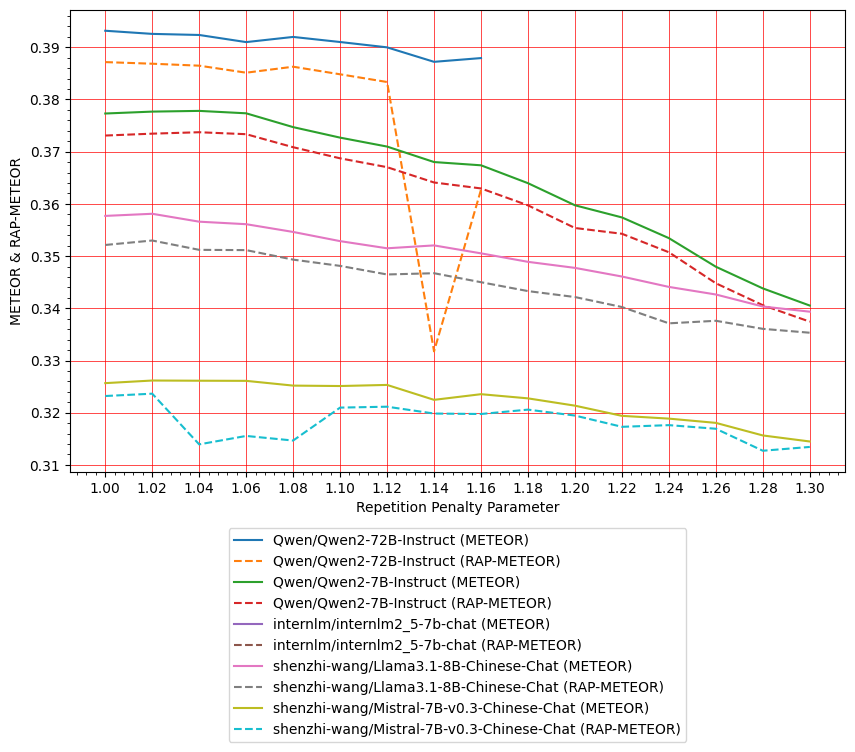

In [23]:
# plot meteor vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["meteor"], label=model + " (METEOR)")
    ax.plot(
        model_df["rpp"], model_df["rap"], label=model + " (RAP-METEOR)", linestyle="--"
    )

ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("METEOR & RAP-METEOR")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.6))
plt.show()

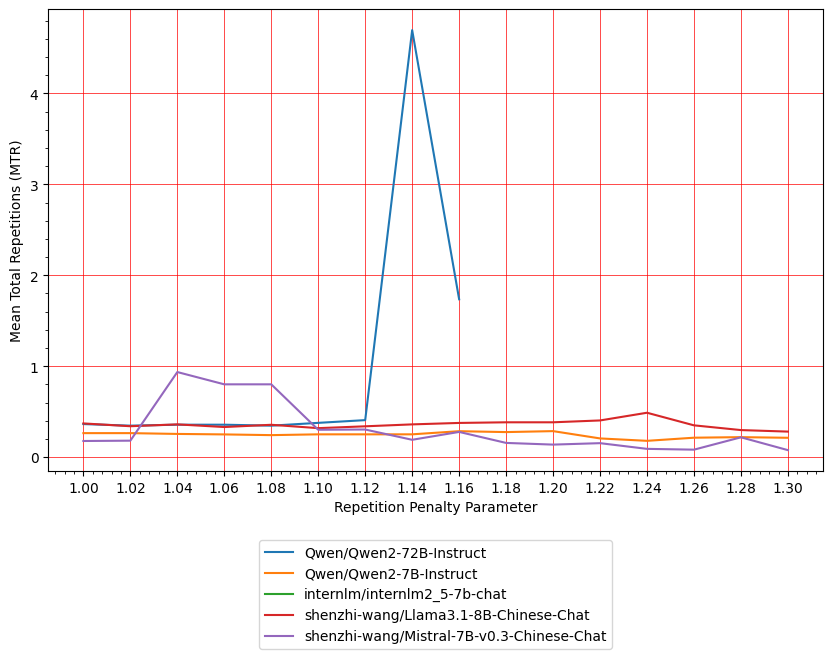

In [24]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["total_repetitions"], label=model)


ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Mean Total Repetitions (MTR)")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.4))
plt.show()

In [15]:
tokenizers = {model: load_tokenizer(model) for model in models}

In [30]:
def detect_repetitions_for_model_outputs(df, col, threshold=100):
    df[["ews_score", "repetition_score", "total_repetitions"]] = df[col].apply(
        detect_scores
    )
    return df.query(f"total_repetitions > {threshold}")

In [31]:
col = "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.04"
rows = detect_repetitions_for_model_outputs(df, col)
rows

chinese                                    english  \
193  “有…… 没有…… 有…… 没有……     'Yes . . . no . . . yes . . . no . . .   
759           我是个什么东西儿!  What sort of creature do you take me for?   

                      Qwen/Qwen2-72B-Instruct/rpp-1.00  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.02  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.04  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.06  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.08  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.10  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.12  \
193  "There is... There isn't... There is... There ...   
759                           What kind of thing am I!   

                      Qwen/Qwen2-72B-Instruct/rpp-1.14  ...  \
193  "There is... There isn't... There is... There ...  ...   
759                           What kind of thing am I!  ...   

    ground_truth_tokens-Qwen/Qwen2-72B-Instruct  \
193                                          17   
759                                          10   

    output_tokens-Qwen/Qwen2-72B-Instruct  \
193                                    14   
759                                     7   

    ground_truth_tokens-Qwen/Qwen2-7B-Instruct  \
193                                         17   
759                                         10   

    output_tokens-Qwen/Qwen2-7B-Instruct  \
193                                    8   
759                                    4   

    ground_truth_tokens-internlm/internlm2_5-7b-chat  \
193                                               18   
759                                               11   

    output_tokens-internlm/internlm2_5-7b-chat  \
193                                         14   
759                                          5   

    ground_truth_tokens-shenzhi-wang/Llama3.1-8B-Chinese-Chat  \
193                                                 17          
759                                                 10          

    output_tokens-shenzhi-wang/Llama3.1-8B-Chinese-Chat  \
193                                                 14    
759                                                  7    

    ground_truth_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  \
193                                                 18              
759                                                 11              

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  
193                                                  9       
759                                                 36       

[2 rows x 73 columns]

In [32]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
Yes, I can help you with that! Here's the translation:

"Yes, I can help you with that! Here's the translation:

有 - Yes
没有 - No

So, the translated content is:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translatio

(0, 784, 784)

In [33]:
col = "Qwen/Qwen2-72B-Instruct/rpp-1.14"
rows = detect_repetitions_for_model_outputs(df, col)
rows

chinese  \
133                                         “目标距琴一公里！”   
327  短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   

                                               english  \
133         'Target is one kilometer from the zither.'   
327  short-long-long-long-long, short-long-long-lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.00  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.02  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.04  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.06  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.08  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.10  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.12  \
133  "The target is one kilometer away from the pia...   
327  Short long long long long, short long long lon...   

                      Qwen/Qwen2-72B-Instruct/rpp-1.14  ...  \
133  "The target is one kilometer away from the pia...  ...   
327  Short long long long long, short long long lon...  ...   

    ground_truth_tokens-Qwen/Qwen2-72B-Instruct  \
133                                          11   
327                                          79   

    output_tokens-Qwen/Qwen2-72B-Instruct  \
133                                    68   
327                                   174   

    ground_truth_tokens-Qwen/Qwen2-7B-Instruct  \
133                                         11   
327                                         79   

    output_tokens-Qwen/Qwen2-7B-Instruct  \
133                                   11   
327                                  205   

    ground_truth_tokens-internlm/internlm2_5-7b-chat  \
133                                               12   
327                                               90   

    output_tokens-internlm/internlm2_5-7b-chat  \
133                                         12   
327                                         58   

    ground_truth_tokens-shenzhi-wang/Llama3.1-8B-Chinese-Chat  \
133                                                 11          
327                                                 75          

    output_tokens-shenzhi-wang/Llama3.1-8B-Chinese-Chat  \
133                                                 11    
327                                                 51    

    ground_truth_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  \
133                                                 12              
327                                                123              

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  
133                                                 13       
327                                                202       

[2 rows x 73 columns]

In [34]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“目标距琴一公里！”
'Target is one kilometer from the zither.'
"The target is one kilometer away from the piano!" 

However, this sentence seems a bit odd as it's unlikely for a target to be measured from a piano. There might be some context missing or perhaps there was an error in the original text. A more likely scenario would be "The target is one kilometer away!" without mentioning any irrelevant objects like a piano. If you have additional context or if the object should indeed be included, please let me know so I can adjust the translation accordingly. For now, I'll stick with the literal translation provided above. But considering common sense and typical usage, a more plausible translation could simply be: "The target is one kilometer away!" if no specific reference point (like a piano) is necessary or intended in the original message. Please clarify if needed. The direct and most faithful translation given the exact wording of your request is:

"The target is one kilometer away from th

(0, 4899, 4899)

In [35]:
df.describe()

ews_score  repetition_score  total_repetitions  \
count     1133.0       1133.000000        1133.000000   
mean         0.0          4.695499           4.695499   
std          0.0        145.689047         145.689047   
min          0.0          0.000000           0.000000   
25%          0.0          0.000000           0.000000   
50%          0.0          0.000000           0.000000   
75%          0.0          0.000000           0.000000   
max          0.0       4899.000000        4899.000000   

       ground_truth_tokens-Qwen/Qwen2-72B-Instruct  \
count                                  1133.000000   
mean                                     29.458076   
std                                      20.126659   
min                                       1.000000   
25%                                      16.000000   
50%                                      25.000000   
75%                                      38.000000   
max                                     135.000000   

       output_tokens-Qwen/Qwen2-72B-Instruct  \
count                            1133.000000   
mean                               31.600177   
std                                64.019707   
min                                 2.000000   
25%                                16.000000   
50%                                24.000000   
75%                                37.000000   
max                              2048.000000   

       ground_truth_tokens-Qwen/Qwen2-7B-Instruct  \
count                                 1133.000000   
mean                                    29.458076   
std                                     20.126659   
min                                      1.000000   
25%                                     16.000000   
50%                                     25.000000   
75%                                     38.000000   
max                                    135.000000   

       output_tokens-Qwen/Qwen2-7B-Instruct  \
count                           1133.000000   
mean                              33.291262   
std                               66.381885   
min                                2.000000   
25%                               15.000000   
50%                               25.000000   
75%                               39.000000   
max                             2048.000000   

       ground_truth_tokens-internlm/internlm2_5-7b-chat  \
count                                       1133.000000   
mean                                          31.362754   
std                                           20.786945   
min                                            2.000000   
25%                                           17.000000   
50%                                           26.000000   
75%                                           40.000000   
max                                          139.000000   

       output_tokens-internlm/internlm2_5-7b-chat  \
count                                 1133.000000   
mean                                    29.661959   
std                                     19.375122   
min                                      4.000000   
25%                                     16.000000   
50%                                     25.000000   
75%                                     37.000000   
max                                    132.000000   

       ground_truth_tokens-shenzhi-wang/Llama3.1-8B-Chinese-Chat  \
count                                        1133.000000           
mean                                           29.432480           
std                                            20.076666           
min                                             1.000000           
25%                                            16.000000           
50%                                            25.000000           
75%                                            38.000000           
max                                           135.000000           

       output_tokens-shenzhi-wang/Llama3.1-8B-Ch